In [2]:
# from sqlalchemy import create_engine
import pandas as pd
import numpy as np
# from binance import Client
import matplotlib.pyplot as plt
# import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
import sys
import ta
import yaml
from data import *
import os
sys.path.insert(1, '/Users/arsenchik/Desktop/dipploma/machine_learning_in_hft/algotrading/backtesting')
from backtest import * 
from strategies import *
from config import *
# color_pal = sns.color_palette()
# plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import (
    log_loss,
    roc_auc_score,
    f1_score,
    mean_squared_error,
    accuracy_score,
    r2_score,
    mean_absolute_error,
)
from model import *

In [2]:
df = get_actual_data('BTCUSDT', end_date='10000 hours ago UTC')

In [14]:
df.shape

(600008, 5)

In [4]:
df = pd.read_csv('data.csv', index_col=False)
df.set_index(['Time'], inplace=True)
df.head()

,Open,High,Low,Close,Volume
Time,,,,,
2022-01-03 23:06:00,46293.89,46363.56,46293.89,46313.06,35.34215
2022-01-03 23:07:00,46313.05,46334.60,46262.16,46299.58,16.99444
2022-01-03 23:08:00,46299.58,46326.37,46294.44,46294.45,12.07571
2022-01-03 23:09:00,46294.44,46310.55,46250.33,46293.49,13.63073
2022-01-03 23:10:00,46293.48,46383.68,46290.00,46351.99,31.07135


In [5]:
from dataset import *

data = Data(df)
data.create_features_and_target(task_type='classification')

In [5]:
from run import run
result_dir_path = '/home/kenny/algotrading/model_training/feature_exps_results'
data_path = '/home/kenny/algotrading/model_training/data.csv'
run(result_dir_path, data_path, [i+1 for i in range(8)], 'LightGBM', 'classification', 'roc_auc')

  0%|          | 0/8 [00:00<?, ?it/s]

[1]	training's binary_logloss: 0.69308
[1]	training's binary_logloss: 0.692889
[1]	training's binary_logloss: 0.69307
[1]	training's binary_logloss: 0.69307
[1]	training's binary_logloss: 0.692889
[1]	training's binary_logloss: 0.692889
[1]	training's binary_logloss: 0.69307
[1]	training's binary_logloss: 0.692888
[2]	training's binary_logloss: 0.693037
[2]	training's binary_logloss: 0.693021
[2]	training's binary_logloss: 0.692694
[2]	training's binary_logloss: 0.693023
[2]	training's binary_logloss: 0.69269
[2]	training's binary_logloss: 0.692691
[2]	training's binary_logloss: 0.693019
[2]	training's binary_logloss: 0.69269
[3]	training's binary_logloss: 0.692983
[3]	training's binary_logloss: 0.693
[3]	training's binary_logloss: 0.692974
[3]	training's binary_logloss: 0.692528
[3]	training's binary_logloss: 0.692524
[3]	training's binary_logloss: 0.692981
[3]	training's binary_logloss: 0.692527
[3]	training's binary_logloss: 0.692524
[4]	training's binary_logloss: 0.69294[4]	trainin

In [7]:
model = Model(model_name='LightGBM')
model.train(data, metric='roc_auc', is_optimized=True)

[LightGBM] [Warning] early_stopping_round is set=340, early_stopping_rounds=340 will be ignored. Current value: early_stopping_round=340
[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] bagging_fraction is set=0.2, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2
[LightGBM] [Warning] min_gain_to_split is set=2.688496030219025, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.688496030219025
[LightGBM] [Warning] lambda_l2 is set=70, reg_lambda=0.0 will be ignored. Current value: lambda_l2=70
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[100]	training's binary_logloss: 0.692088
[200]	training's binary_logloss: 0.692024
[300]	training's binary_logloss: 0.691943
[400]	training's binary_logloss: 

0.5310676676574401

In [9]:
model.model_trained

LGBMClassifier(bagging_fraction=0.2, bagging_freq=1, early_stopping_rounds=340,
               feature_fraction=0.9, lambda_l1=40, lambda_l2=70,
               learning_rate=0.19181080420497643, max_depth=6,
               min_gain_to_split=2.688496030219025, n_estimators=10000,
               num_leaves=1600)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

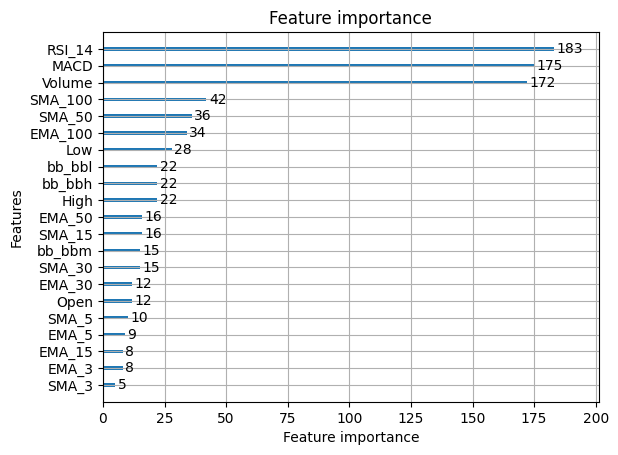

In [10]:
lgb.plot_importance(model.model_trained)

In [1]:
from dataset import *
import pandas as pd

df = pd.read_csv('data.csv')
df.set_index("Time", inplace=True)
data = Data(df.drop(['RSI_2','RSI_4','RSI_6','RSI_8', 'SMA_20', 'SMA_40', 'SMA_60', 'SMA_80', 'Target'], axis=1))

data.indicators_calc()
data.create_features_and_target(task_type='regression')
data.df

,Open,High,Low,Close,Volume,RSI_14,SMA_3,EMA_3,SMA_5,EMA_5,...,MACD,bb_bbm,bb_bbh,bb_bbl,close_1,close_2,close_3,close_4,close_5,Target
Time,,,,,,,,,,,,,,,,,,,,,
2023-01-09 07:35:00,17206.05,17206.61,17196.10,17198.90,142.54265,48.745912,17202.063333,17201.359573,17201.988,17202.014953,...,2.579172,17200.9405,17212.056578,17189.824422,17206.05,17201.24,17199.08,17204.67,17205.34,0.28
2023-01-09 07:36:00,17198.90,17205.52,17197.32,17199.18,130.69914,49.099988,17201.376667,17200.269786,17200.890,17201.069969,...,2.409359,17201.3355,17211.577468,17191.093532,17198.90,17206.05,17201.24,17199.08,17204.67,-2.45
2023-01-09 07:37:00,17199.53,17200.86,17196.31,17196.73,74.45345,46.099077,17198.270000,17198.499893,17200.420,17199.623313,...,2.168738,17201.6235,17210.967992,17192.279008,17199.18,17198.90,17206.05,17201.24,17199.08,-3.06
2023-01-09 07:38:00,17197.12,17197.94,17191.52,17193.67,126.46866,42.597259,17196.526667,17196.084947,17198.906,17197.638875,...,1.842586,17201.6815,17210.810932,17192.552068,17196.73,17199.18,17198.90,17206.05,17201.24,-0.48
2023-01-09 07:39:00,17193.23,17194.56,17192.37,17193.19,56.20148,42.057563,17194.530000,17194.637473,17196.334,17196.155917,...,1.468065,17201.7340,17210.653001,17192.814999,17193.67,17196.73,17199.18,17198.90,17206.05,2.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-19 20:30:00,24322.02,24360.68,24307.69,24354.57,368.99968,41.152974,24339.343333,24349.293190,24360.278,24356.787408,...,-26.265467,24387.1740,24454.208433,24320.139567,24321.94,24341.52,24377.74,24405.62,24409.96,-2.44
2023-02-19 20:31:00,24354.57,24365.59,24331.49,24352.13,256.06983,40.796491,24342.880000,24350.711595,24349.580,24355.234939,...,-26.469493,24384.7130,24453.085609,24316.340391,24354.57,24321.94,24341.52,24377.74,24405.62,7.83
2023-02-19 20:32:00,24352.13,24364.22,24337.53,24359.96,214.97637,42.517296,24355.553333,24355.335798,24346.024,24356.809959,...,-26.407445,24382.1570,24450.217118,24314.096882,24352.13,24354.57,24321.94,24341.52,24377.74,46.69


In [ ]:
import pandas as pd
from model import *
import warnings
from dataset import *
warnings.filterwarnings("ignore")
df = pd.read_csv('data.csv')
df.set_index("Time", inplace=True)
data = Data(df)
data.indicators_calc()
data.create_target(task_type='classification')
model = Model(model_name="LightGBM", task_type="classification")
# output_dir_path = '/Users/arsenchik/Desktop/dipploma/machine_learning_in_hft/algotrading/model_training/optimization_results'
output_dir_path = '/home/kenny/algotrading/model_training/optimization_results'
model.optimize(data, output_dir_path, number_of_trials=50)

In [17]:
tss = TimeSeriesSplit(n_splits=5, test_size=3*24*60)
df = df.sort_index()

fold = 0
preds = []
scores = []

for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    clf = lgb.LGBMClassifier(n_estimators=1000)
    clf.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = clf.predict(X_test)
    preds.append(y_pred)
    score = f1_score(y_test, y_pred)
    scores.append(score)

[100]	training's binary_logloss: 0.652832	valid_1's binary_logloss: 0.695833
[200]	training's binary_logloss: 0.62319	valid_1's binary_logloss: 0.698619
[300]	training's binary_logloss: 0.597564	valid_1's binary_logloss: 0.702441
[400]	training's binary_logloss: 0.574426	valid_1's binary_logloss: 0.706435
[500]	training's binary_logloss: 0.553463	valid_1's binary_logloss: 0.711089
[600]	training's binary_logloss: 0.532816	valid_1's binary_logloss: 0.714488
[700]	training's binary_logloss: 0.514628	valid_1's binary_logloss: 0.717471
[800]	training's binary_logloss: 0.496315	valid_1's binary_logloss: 0.719973
[900]	training's binary_logloss: 0.480044	valid_1's binary_logloss: 0.722234
[1000]	training's binary_logloss: 0.465002	valid_1's binary_logloss: 0.725299
[100]	training's binary_logloss: 0.655826	valid_1's binary_logloss: 0.697673
[200]	training's binary_logloss: 0.628066	valid_1's binary_logloss: 0.702078
[300]	training's binary_logloss: 0.603626	valid_1's binary_logloss: 0.704248

In [18]:
print(f'score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

RMSE score across folds 0.4996
Fold scores:[0.5188419117647058, 0.5426714195848187, 0.48532948532948533, 0.4695270599707459, 0.4814723926380368]


In [ ]:
reg = xgb.XGBRegressor(booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
reg.fit(data[FEATURES], data[TARGET],
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)